<a href="https://colab.research.google.com/github/aryan2107-cloud/100-Day-ML-Challenge-/blob/main/Day03(DataDistribution).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.style.use('seaborn-v0_8-whitegrid')
print('Setup complete!')

Setup complete!


Explore the dataset

In [2]:
df = sns.load_dataset('titanic')

print(f"Dataset Shape: {df.shape}")
print(f"\n Columns: {list(df.columns)}")
df.head(10)

Dataset Shape: (891, 15)

 Columns: ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [3]:
print('Data Types: ')
print(df.dtypes)
print(f"\nMissing Values:")
print(df.isnull().sum()[df.isnull().sum() > 0])

Data Types: 
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

Missing Values:
age            177
embarked         2
deck           688
embark_town      2
dtype: int64


In [4]:
# Focus on numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numeric columns: {numeric_cols}")

df[numeric_cols].describe()

Numeric columns: ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Visualize the distributions of each numeric column

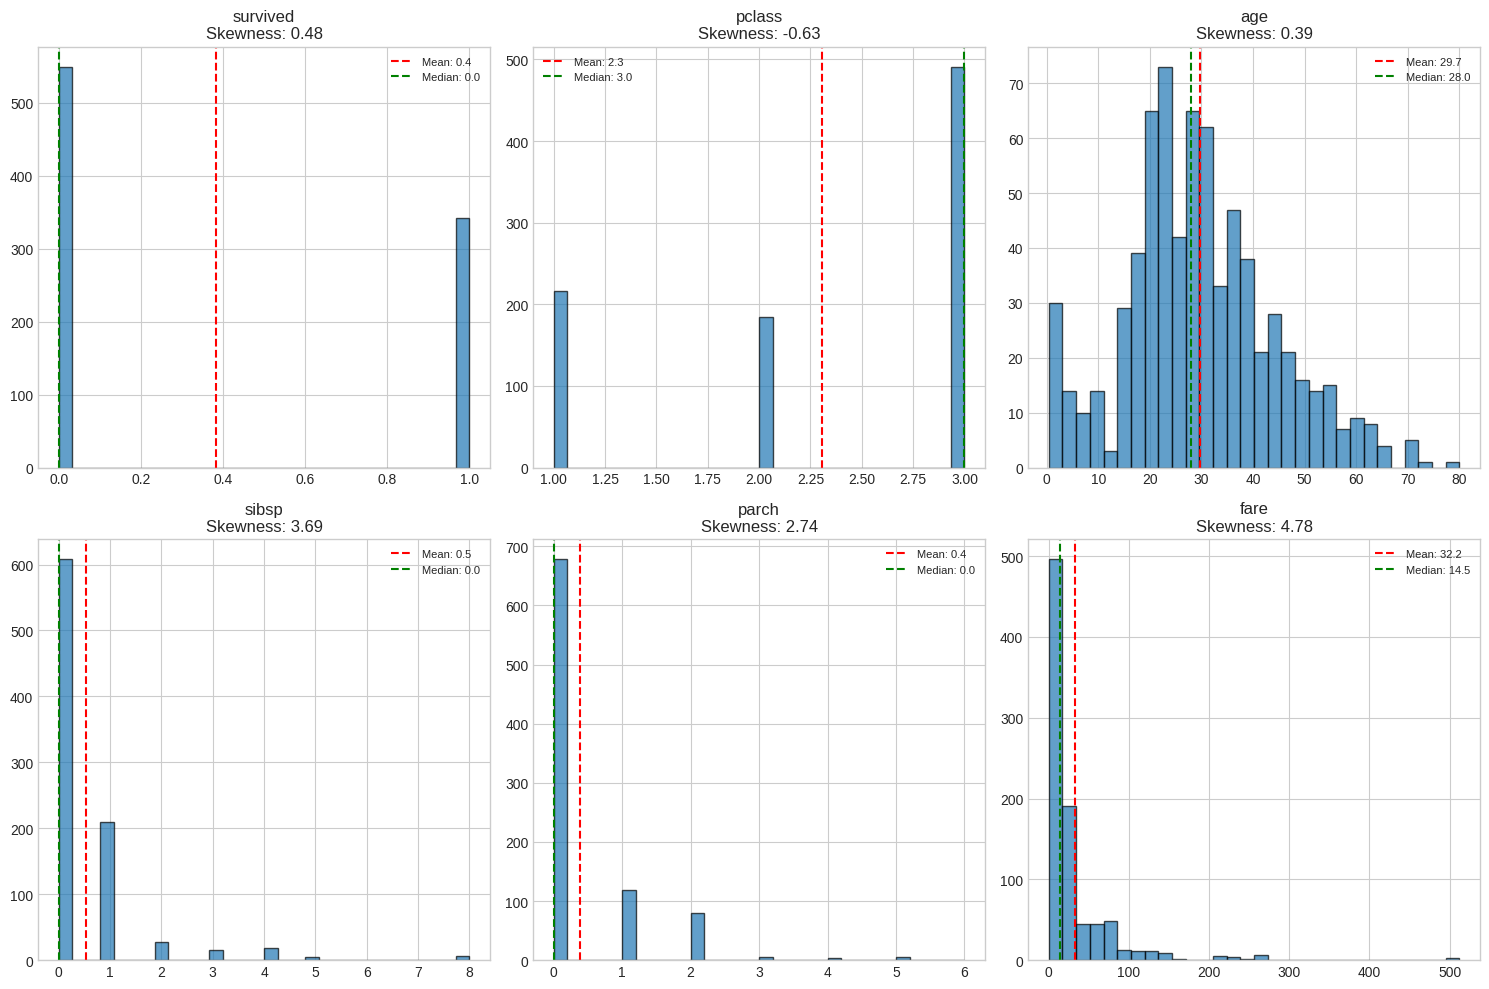


Quick Interpretation:
- Skewness near 0 = symmetric (possibly Normal)
- Skewness > 0 = right-skewed (possibly Log-Normal)
- Skewness < 0 = left-skewed


In [5]:
# Plot histograms of all numeric columns
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    data = df[col].dropna()

    axes[i].hist(data, bins=30, edgecolor='black', alpha=0.7)
    axes[i].axvline(data.mean(), color='red', linestyle='--', label=f'Mean: {data.mean():.1f}')
    axes[i].axvline(data.median(), color='green', linestyle='--', label=f'Median: {data.median():.1f}')

    skewness = stats.skew(data)
    axes[i].set_title(f'{col}\nSkewness: {skewness:.2f}')
    axes[i].legend(fontsize=8)

# Hide unused subplots
for j in range(len(numeric_cols), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

print("\nQuick Interpretation:")
print("- Skewness near 0 = symmetric (possibly Normal)")
print("- Skewness > 0 = right-skewed (possibly Log-Normal)")
print("- Skewness < 0 = left-skewed")

Deep dive into the Fare column

In [6]:
fare = df['fare'].dropna().values

print(f"Fare Statistics:")
print(f"Count: {len(fare)}")
print(f"Mean: ${fare.mean():.2f}")
print(f"Median: ${np.median(fare):.2f}")
print(f"Min: ${fare.min():.2f}")
print(f"Max: ${fare.max():.2f}")
print(f"Std Dev: ${fare.std():.2f}")
print(f"Skewness: {stats.skew(fare):.2f}")
print(f"Kurtosis: {stats.kurtosis(fare):.2f}")

Fare Statistics:
Count: 891
Mean: $32.20
Median: $14.45
Min: $0.00
Max: $512.33
Std Dev: $49.67
Skewness: 4.78
Kurtosis: 33.20


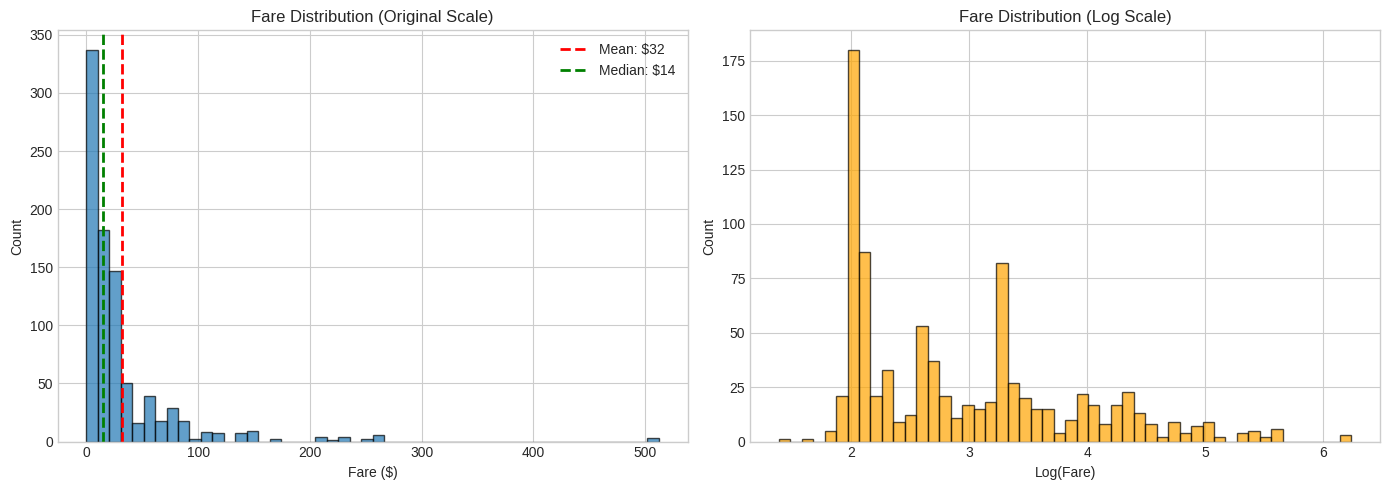

Notice: Log-transformed fare looks much more symmetric!


In [7]:
# Detailed histogram of fare
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Regular scale
axes[0].hist(fare, bins=50, edgecolor='black', alpha=0.7)
axes[0].axvline(fare.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ${fare.mean():.0f}')
axes[0].axvline(np.median(fare), color='green', linestyle='--', linewidth=2, label=f'Median: ${np.median(fare):.0f}')
axes[0].set_xlabel('Fare ($)')
axes[0].set_ylabel('Count')
axes[0].set_title('Fare Distribution (Original Scale)')
axes[0].legend()

# Log scale (to see the shape better)
fare_positive = fare[fare > 0]  # Remove zeros for log
axes[1].hist(np.log(fare_positive), bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1].set_xlabel('Log(Fare)')
axes[1].set_ylabel('Count')
axes[1].set_title('Fare Distribution (Log Scale)')

plt.tight_layout()
plt.show()

print("Notice: Log-transformed fare looks much more symmetric!")

Fitting distributions to fare

In [8]:
def fit_distribution(data, dist_name):
  """
  returns
  - params = fitted parameters
  - ks_pvalue = Kolmogorov-Smirnov p-value
  - bic = Bayesian Information Criterion (lower = better fit)

  """

  dist = getattr(stats, dist_name)

  #fit parameters
  params = dist.fit(data)

  #kS test: null hypothesis is that data comes from this distribution
  ks_stat, ks_pvalue = stats.kstest(data, dist_name, args=params)

  #calculate BIC
  log_likelihood = np.sum(dist.logpdf(data, *params))
  k  = len(params)
  n = len(data)
  bic = k * np.log(n) - 2 * log_likelihood

  return {
        'distribution': dist_name,
        'params': params,
        'ks_stat': ks_stat,
        'ks_pvalue': ks_pvalue,
        'bic': bic
    }


In [9]:
#Fit mulltiple distributions to fare
fare_positive = fare[fare > 0]
distributions_to_try = ['norm', 'lognorm', 'expon', 'gamma', 'weibull_min']

results = []
for dist_name in distributions_to_try:
  try:
    result = fit_distribution(fare_positive, dist_name)
    results.append(result)
    print(f"{dist_name:12} | ks p-value: {result['ks_pvalue']:.4f} | BIC: {result['bic']:.0f}")
  except Exception as e:
    print(f"{dist_name:12} | Error: {e}")

#Sort by BIC
results_df = pd.DataFrame(results).sort_values('bic')
print(f"\n-> Best fit by BIC: {results_df.iloc[0]['distribution']}")



#

norm         | ks p-value: 0.0000 | BIC: 9350
lognorm      | ks p-value: 0.0000 | BIC: 7318
expon        | ks p-value: 0.0000 | BIC: 7649
gamma        | ks p-value: 0.0000 | BIC: 25908
weibull_min  | ks p-value: 0.0000 | BIC: inf

-> Best fit by BIC: lognorm


In [10]:
# Show rankings
print("\nDistribution Rankings (lower BIC = better):")
print("="*50)
results_df['rank'] = range(1, len(results_df)+1)
print(results_df[['rank', 'distribution', 'ks_pvalue', 'bic']].to_string(index=False))


Distribution Rankings (lower BIC = better):
 rank distribution    ks_pvalue          bic
    1      lognorm 2.642036e-15  7317.857384
    2        expon 2.775523e-32  7649.466611
    3         norm 2.570840e-68  9350.179752
    4        gamma 0.000000e+00 25907.691313
    5  weibull_min 3.075398e-11          inf


Understanding the Metrics:

KS p-value	Probability that data comes from this distribution	> 0.05 (Good value - can't reject)

BIC	Fit quality penalized by complexity	(Lower = better)


Visualize the best fit

In [11]:
#Get best fit
best = results_df.iloc[0]
best_dist = getattr(stats, best['distribution'])
best_params = best['params']

print(f"Best Fit: {best['distribution']}")
print(f"parameters: {best_params}")

Best Fit: lognorm
parameters: (np.float64(1.2014532838316188), 3.950103903438021, np.float64(12.97192174642268))


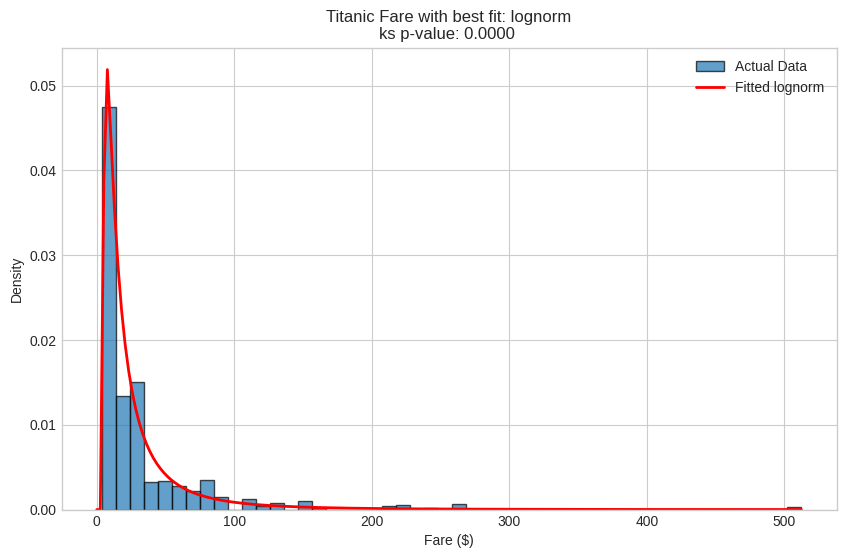

In [12]:
#Plotting a histogram with the fitted PDF
fig, ax = plt.subplots(figsize=(10, 6))

#Histogram
ax.hist(fare_positive, bins=50, density=True, alpha=0.7, edgecolor='black', label='Actual Data')

#Fitted PDF
x = np.linspace(0, fare_positive.max(), 200)
pdf = best_dist.pdf(x, *best_params)
ax.plot(x, pdf, 'r-', linewidth=2, label=f"Fitted {best['distribution']}")

ax.set_xlabel('Fare ($)')
ax.set_ylabel('Density')
ax.set_title(f"Titanic Fare with best fit: {best['distribution']}\nks p-value: {best['ks_pvalue']:.4f} ")
ax.legend()
plt.show()

Q-Q Plot (Visual Goodness-of-fit)

In [13]:
def plot_qq(data, dist_name, params, title=None):
  """
  Plots a Q-Q plot for the given data and distribution.

  - Points on diagonal = good fit
  - Curved pattern = Wrong distribution
  - Deviation at tails = Tail behavior mismatch

  """

  fig, ax = plt.subplots(figsize=(8, 8))

  dist = getattr(stats, dist_name)
  sorted_data = np.sort(data)
  n = len(sorted_data)

  probabilities = np.linspace(0.001, 0.999, n)
  theoretical_quantiles = dist.ppf(probabilities, *params)

  #plot
  ax.scatter(theoretical_quantiles, sorted_data, alpha=0.5, s=20, label="Data points")

  #perfect fit line
  min_val = min(theoretical_quantiles.min(), sorted_data.min())
  max_val = max(theoretical_quantiles.max(), sorted_data.max())
  ax.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='perfect fit')

  ax.set_xlabel('Theoretical Quantiles')
  ax.set_ylabel('Observed Quantiles')
  ax.set_title(f"Q-Q Plot for {dist_name}")
  ax.legend()

  plt.tight_layout()
  return fig

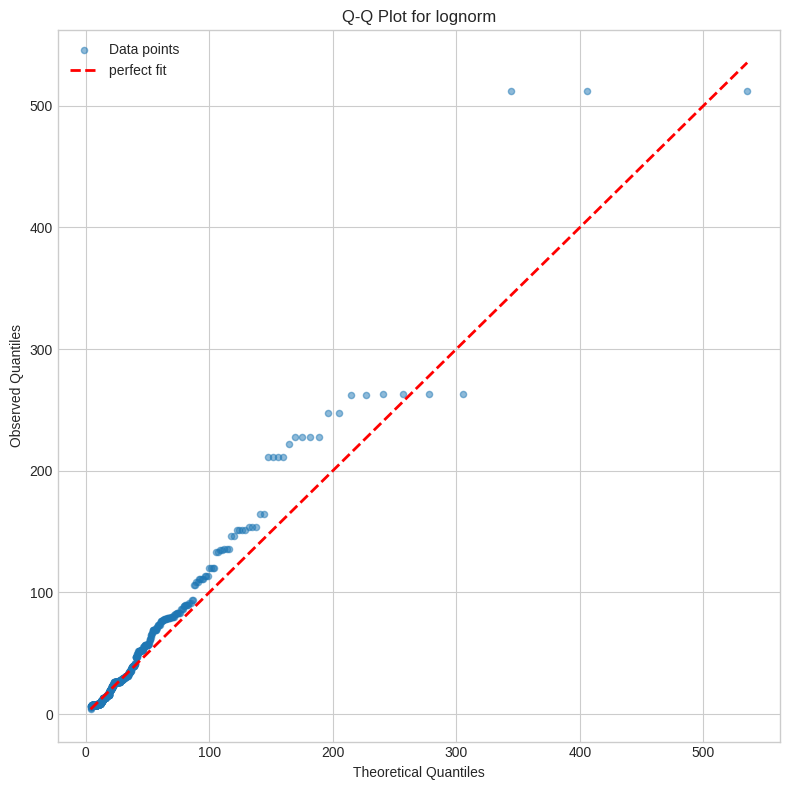

Interpretation
- Points on diagonal = good fit
- Curved pattern = Wrong distribution
- Deviation at tails = Tail behavior mismatch


In [14]:
#Q-Q plot for best fit
plot_qq(fare_positive, best['distribution'], best_params,
                            f"Q-Q plot: fare vs {best['distribution']}")
plt.show()

print("Interpretation")
print("- Points on diagonal = good fit")
print("- Curved pattern = Wrong distribution")
print("- Deviation at tails = Tail behavior mismatch")

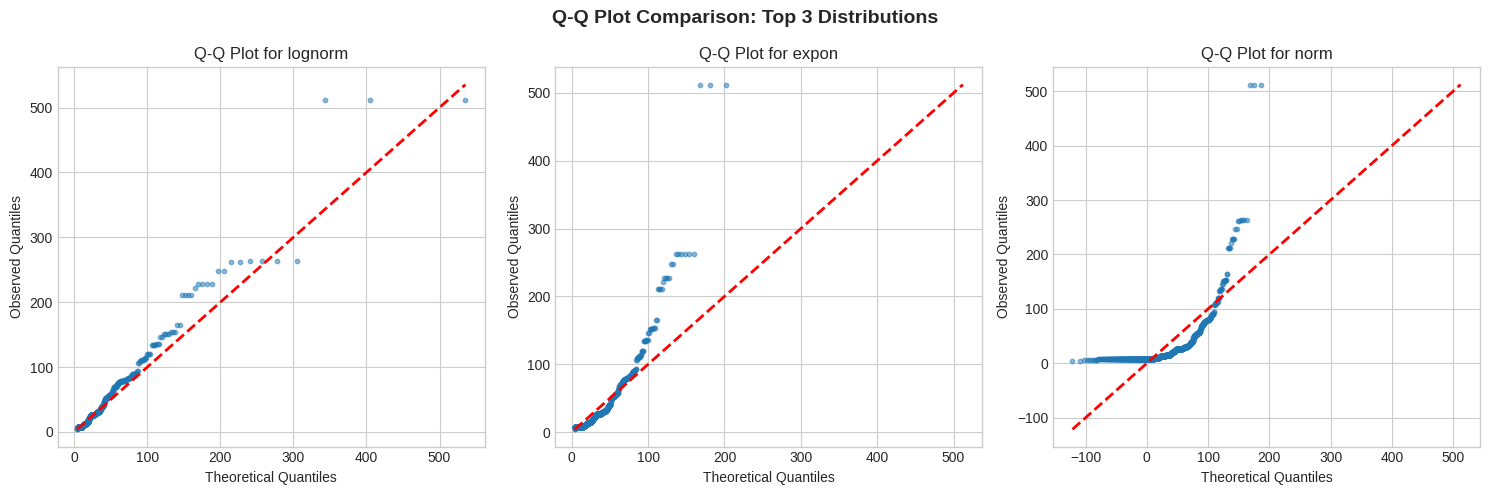

In [15]:
#compare Q-Q plots for different distributions
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, (_,row) in zip(axes, results_df.head(3).iterrows()):
  dist = getattr(stats, row['distribution'])
  sorted_data = np.sort(fare_positive)
  n = len(sorted_data)

  theoretical_q = dist.ppf(np.linspace(0.001, 0.999, n), *row['params'])

  ax.scatter(theoretical_q, sorted_data, alpha=0.5, s=10)
  lims = [min(theoretical_q.min(), sorted_data.min()),
          max(theoretical_q.max(), sorted_data.max())]
  ax.plot(lims, lims, '--r', linewidth=2)
  ax.set_xlabel('Theoretical Quantiles')
  ax.set_ylabel('Observed Quantiles')
  ax.set_title(f"Q-Q Plot for {row['distribution']}")

plt.suptitle('Q-Q Plot Comparison: Top 3 Distributions', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

Transforming fare to make it normal

In [22]:
def test_normality(data, name):
  """
  Text if data is normally distributed using Shapiro-Wilk test"""

  if len(data) > 5000:
    data = np.random.choice(data, 50000, replace=False)

  stat, p_value = stats.shapiro(data)
  skewness = stats.skew(data)

  return {
      'transformation': name,
      'shapiro_p': p_value,
      'skewness': skewness,
      'is_normal': 'Yes' if p_value > 0.05 else 'No'
  }

In [23]:
#Try different transformation
fare_clean = fare[fare > 0]

transformations = {
    'original': fare_clean,
    'Log': np.log(fare_clean),
    'Square Root': np.sqrt(fare_clean),
    'Cube Root': np.cbrt(fare_clean)
}

#box-cox finds the optimal power transformation
bc_data, bc_lambda = stats.boxcox(fare_positive)
transformations[f'Box-Cox (lambda={bc_lambda:.2f})'] = bc_data

#Test each
results = []
for name, data in transformations.items():
  result  = test_normality(data, name)
  results.append(result)

transform_df = pd.DataFrame(results).sort_values('shapiro_p', ascending=False)
transform_df['rank'] = range(1, len(transform_df)+1)

print("Transformation comparison (higher shapiro p = more normal):")
print('='*65)
print(transform_df[['rank', 'transformation', 'shapiro_p', 'skewness', 'is_normal']].to_string(index=False))

Transformation comparison (higher shapiro p = more normal):
 rank         transformation    shapiro_p  skewness is_normal
    1 Box-Cox (lambda=-0.52) 3.963709e-21  0.217466        No
    2                    Log 2.546379e-24  0.899728        No
    3              Cube Root 1.472465e-30  1.664577        No
    4            Square Root 3.981769e-34  2.210850        No
    5               original 1.622051e-43  4.761945        No


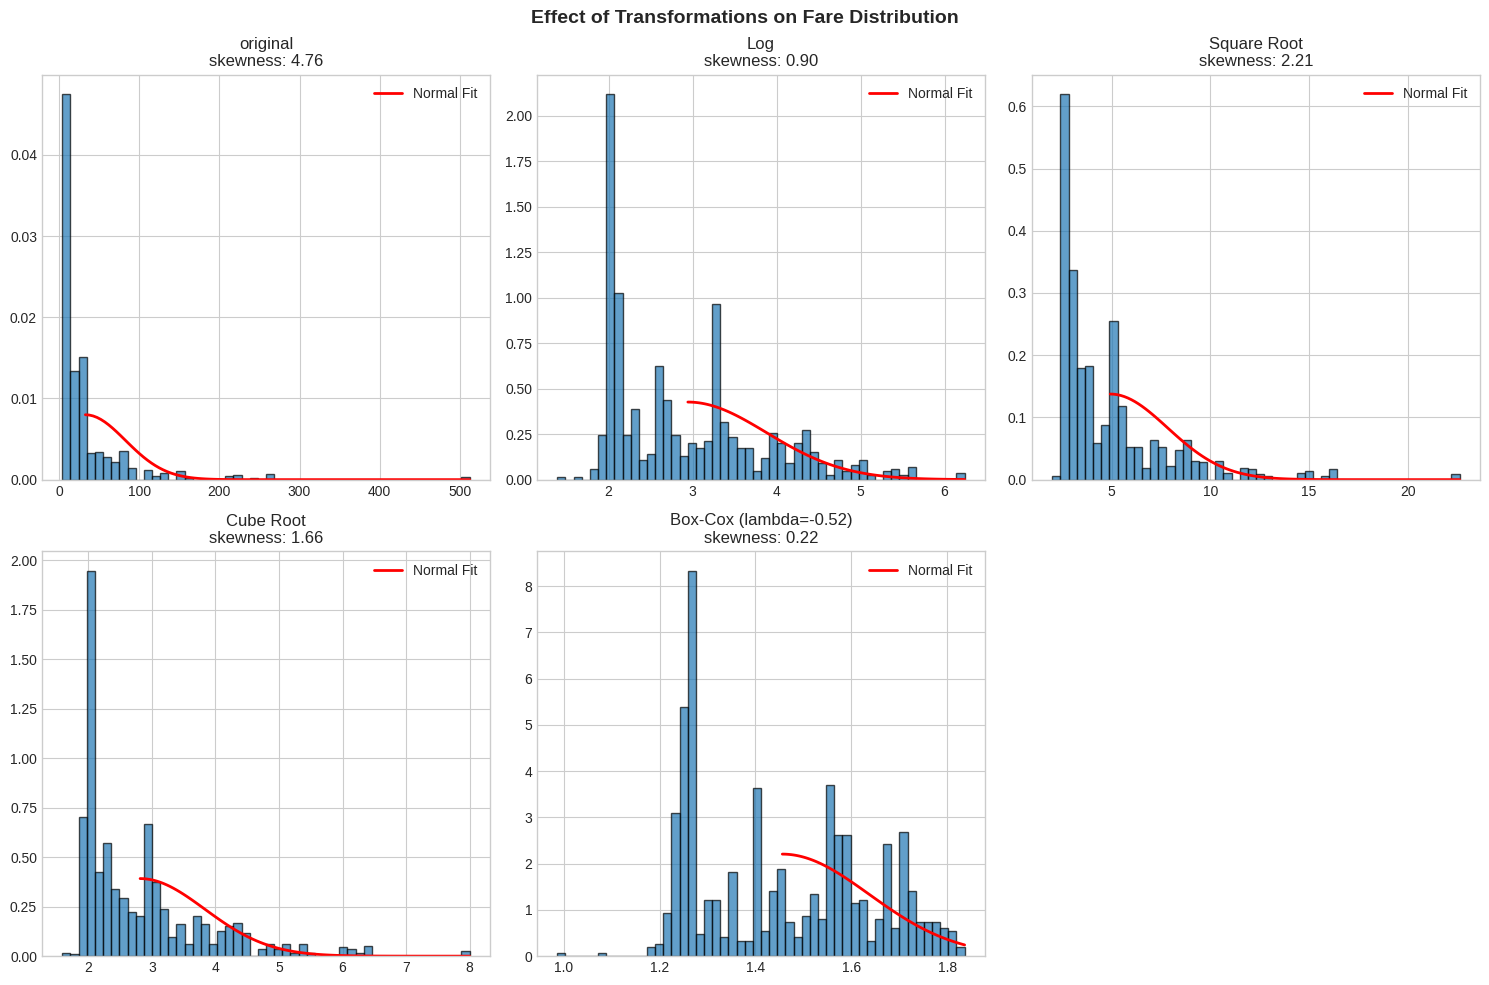

In [26]:
#Visualize transformations
fig,  axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for ax, (name, data) in zip(axes, transformations.items()):
  #histogram
  ax.hist(data, bins=50, density=True, edgecolor='black', alpha = 0.7)

  mu, std = np.mean(data), np.std(data)
  x = np.linspace(data.mean(), data.max(), 100)
  ax.plot(x, stats.norm.pdf(x, mu, std), 'r-', linewidth=2, label='Normal Fit')

  skew = stats.skew(data)
  ax.set_title(f'{name}\nskewness: {skew:.2f}')
  ax.legend()

axes[-1].set_visible(False)

plt.suptitle('Effect of Transformations on Fare Distribution', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()